In [1]:
#Primero hay que llamar a unas librerías que el programa necesitará.
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Cargamos el fichero de datos. Formato en Excel, csv.
AH_data = pd.read_csv("dia1.csv")

In [3]:
AH_data.drop('Tipo de Suelo', axis=1, inplace=True)
AH_data.drop('Análisis', axis=1, inplace=True)

In [4]:
AH_data.head()

,T° Ambiental (°C) BRUTO,Velocidad del viento (KM/H),T° Ambiental (°C),Valor de tipo de suelo,PH Agua,PH Suelo,Humedad Suelo (%),Humedad Suelo Deseada (%),T° Suelo (°C),T° Suelo Deseada (°C),Análisis valor
0,39,62,15,1,14,3,19,45,15,15,0
1,16,62,7,2,9,8,36,50,7,23,1
2,24,18,17,1,13,10,39,30,8,17,0
3,2,17,4,2,9,5,31,70,16,15,0
4,19,30,7,3,2,9,12,70,13,15,1


In [5]:
#Eliminamos los datos con valores missing porque Python no puede hacer árboles con datos missing
data_clean = AH_data.dropna()

In [6]:
#Para comprobar que se ha leído bien, podemos lista las variables en el fichero y sacar los principales estadísticos
data_clean.dtypes

T° Ambiental (°C) BRUTO        int64
Velocidad del viento (KM/H)    int64
T° Ambiental (°C)              int64
Valor de tipo de suelo         int64
PH Agua                        int64
PH Suelo                       int64
Humedad Suelo (%)              int64
Humedad Suelo Deseada (%)      int64
T° Suelo (°C)                  int64
T° Suelo Deseada (°C)          int64
Análisis valor                 int64
dtype: object

In [7]:
#Principales estadísticos
data_clean.describe()

,T° Ambiental (°C) BRUTO,Velocidad del viento (KM/H),T° Ambiental (°C),Valor de tipo de suelo,PH Agua,PH Suelo,Humedad Suelo (%),Humedad Suelo Deseada (%),T° Suelo (°C),T° Suelo Deseada (°C),Análisis valor
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,20.265306,44.734694,13.204082,3.061224,7.061224,7.469388,22.551020,44.204082,11.510204,20.489796,0.693878
std,13.198446,28.591065,10.080880,1.736953,4.375158,4.163843,18.050925,15.186315,7.662469,4.402284,0.465657
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.000000
25%,10.000000,18.000000,4.000000,2.000000,3.000000,4.000000,5.000000,30.000000,5.000000,17.000000,0.000000
50%,22.000000,48.000000,13.000000,3.000000,7.000000,8.000000,22.000000,41.000000,10.000000,20.000000,1.000000
75%,33.000000,70.000000,21.000000,4.000000,11.000000,11.000000,37.000000,50.000000,18.000000,25.000000,1.000000
max,40.000000,88.000000,35.000000,7.000000,14.000000,14.000000,64.000000,70.000000,25.000000,27.000000,1.000000


In [8]:
data_clean.keys()

Index(['T° Ambiental (°C) BRUTO', 'Velocidad del viento (KM/H)',
       'T° Ambiental (°C)', 'Valor de tipo de suelo', 'PH Agua', 'PH Suelo',
       'Humedad Suelo (%)', 'Humedad Suelo Deseada (%)', 'T° Suelo (°C)',
       'T° Suelo Deseada (°C)', 'Análisis valor'],
      dtype='object')

In [9]:
#Indicamos las variables predictoras y debajo la variable objetivo. Cada uno con los nombres de las variables que tenéis en el fichero csv.
predictors = data_clean[['T° Ambiental (°C) BRUTO', 'Velocidad del viento (KM/H)', 'Valor de tipo de suelo','Humedad Suelo (%)',  'T° Suelo (°C)']] 

In [10]:
targets = data_clean['Análisis valor']

In [11]:
#Creamos la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo, siendo test el 40%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [12]:
#Comprobamos el tamaño de las diferentes muestras (pred=predictora; tar=target, objetivo). La salida en cada caso es una pareja de datos: el tamaño de la muestra y el número de variables
print(pred_train.shape,
pred_test.shape,
tar_train.shape,
tar_test.shape)

(29, 5) (20, 5) (29,) (20,)


In [13]:
#Construimos el árbol con los datos de entrenamiento
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [14]:
#Predecimos para los valores del grupo Test
predictions=classifier.predict(pred_test)

In [15]:
#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives. 
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[ 2,  4],
       [ 3, 11]])

In [16]:
#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
sklearn.metrics.accuracy_score(tar_test, predictions)

0.65000000000000002

In [17]:
#Para dibujar el árbol hay que importar otra serie de cosas
from sklearn import tree
from io import StringIO
from IPython.display import Image

In [18]:
resultado=['regar','no regar']

In [19]:
#Pintamos el árbol
out = StringIO()
tree.export_graphviz(classifier, out_file='treeMacarena.dot', feature_names=data_clean.keys(),filled=True,rounded=True
                ,proportion=True,class_names=resultado)


In [20]:
from PIL import Image

In [21]:
i = Image.open('tree.png','r') 

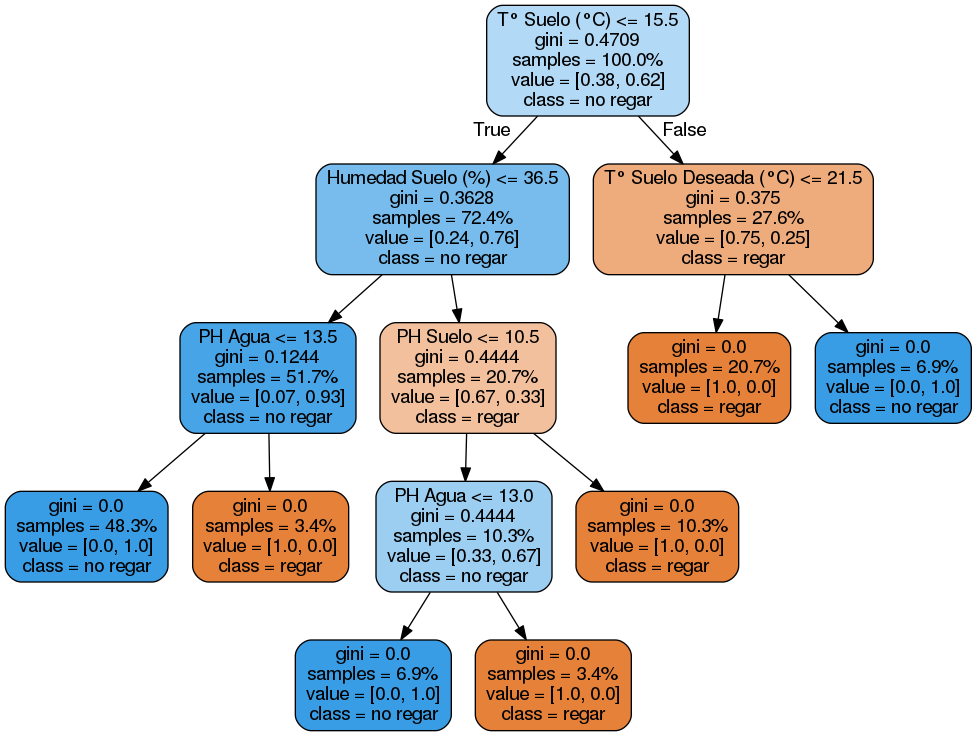

In [22]:
i

In [23]:
#comando
#dot -Tpng treeMacarena.dot -o tree_simple.png

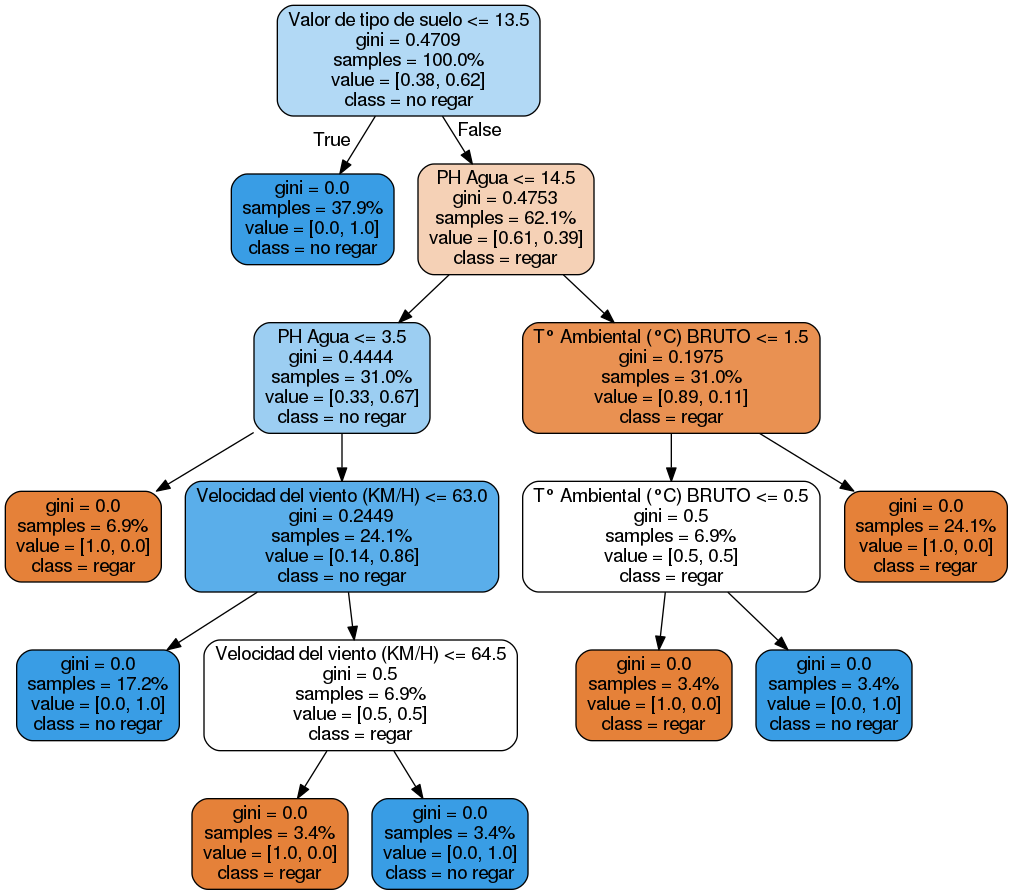

In [25]:
j = Image.open('tree_simple.png','r') 
j